In [2]:
# Dataframe and arry
import numpy as np
import pandas as pd

# Historical data from binance
from binance.client import Client

# convert timestamp to Data and Time convert (UTC)
from datetime import datetime, date
import time 

# Plot Graph
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns
import mplfinance as mpf

# Column Labels
row_col = [
    'OpenTime',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'CloseTime',
    'QuoteAssetVol',
    'NumberofTrades',
    'TakerbaseVol',
    'TakerquoteVol',
    'Ignor'
]

OHLC_col = [
    'Open',
    'High',
    'Low',
    'Close',
]

# Period to Collect Data
period_dic = {
    '15m' : '15 minutes ago UTC',
    '30m' : '30 minutes ago UTC',
    '60m' : '60 minutes ago UTC',
    '1d' : '1 day ago UTC',
    '7d' : '7 day ago UTC',
    '15d' : '15 day ago UTC',
    '30d' : '30 day ago UTC',
    '60d' : '60 day ago UTC',
    '1y' : '360 day ago UTC',
#     'start' : '29 Jun, 2021',
#     'end' : '31 Jul, 2021'
}

In [7]:
from setting import API_key,Secret_key

# Check Binance Status
client = Client(API_key, Secret_key)
status = client.get_system_status()
print(status)

{'status': 0, 'msg': 'normal'}


In [13]:
# df = get_kline('BTCUSDT', '4h', '1y')
def get_kline(symbol, tf, period): 
    klines = client.get_historical_klines(symbol, tf, period_dic[period])
    df = prepare_data(klines)
    return df

# df = get_kline_by_period('BTCUSDT', tf_dict['1d'], '2021-3', 'today')
def get_kline_by_period(symbol, tf, start, end):
    klines = client.get_historical_klines(symbol, tf, start, end)
    df = prepare_data(klines)
    return df
    
def prepare_data(klines):
    data = pd.DataFrame(klines, columns=row_col)
    data['OpenTime'] = pd.to_datetime(data['OpenTime'], unit='ms').dt.tz_localize('Asia/Bangkok')
    data['CloseTime'] = pd.to_datetime(data['CloseTime'], unit='ms').dt.tz_localize('Asia/Bangkok')
    df = data[['Open','High','Low','Close','Volume','QuoteAssetVol','TakerbaseVol','TakerquoteVol']].astype(float)
    df.set_index(data['OpenTime'], inplace=True)
    return df

def plotgraph(x,y):
    plt.figure(figsize=(30,5))
    plt.plot(x,y,linewidth=1, color='black')
    plt.xticks(rotation=65)
    plt.show()

### test function get kline

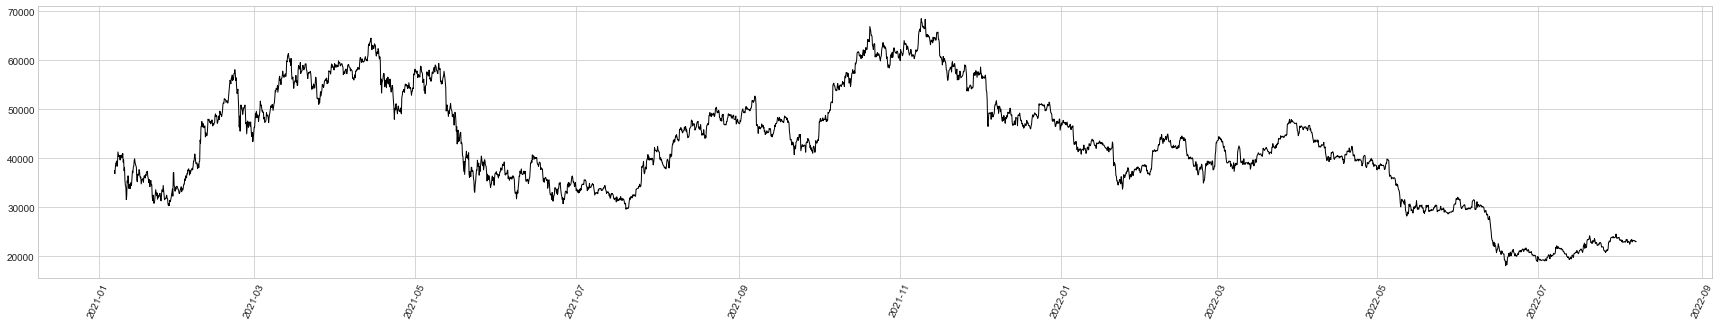

In [14]:
df = get_kline_by_period('BTCUSDT', '4h', '2021-1', 'today')
plotgraph(df.index,df.Close)

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3464 entries, 2021-01-07 00:00:00+07:00 to 2022-08-07 04:00:00+07:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3464 non-null   float64
 1   High           3464 non-null   float64
 2   Low            3464 non-null   float64
 3   Close          3464 non-null   float64
 4   Volume         3464 non-null   float64
 5   QuoteAssetVol  3464 non-null   float64
 6   TakerbaseVol   3464 non-null   float64
 7   TakerquoteVol  3464 non-null   float64
dtypes: float64(8)
memory usage: 243.6 KB
None
